# Doctor's Consultation Fees Prediction

Description: In this dataset Dependet variables contains the descrate continues independent variables and dependent variable is Doctor "Fee"  and independent variables given below


Features Variables -

    Qualification,
    Experience
    Rating,
    Profile
    Miscellaneous_Info,
    Fees
    Place

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [270]:
# reading the Excel file 
df_train = pd.read_excel('Final_Train.xlsx', sheetname='Sheet1')
df_test = pd.read_excel('Final_Test.xlsx', sheetname='Sheet1')


In [271]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [272]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [273]:
print(df_train.shape, df_test.shape)

(5961, 7) (1987, 6)


Observation: 
1. Data training set contains 5961 records and 7 variables
2. Data test set contains the 1987 records and 6 variables
    

In [274]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None


Observation: 
1. dataset contains one interger, 6 object data types

In [275]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.2+ KB


In [276]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observation:
Variables "Rating,Place, miscellaneous_info" contians the null values

In [277]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Obseravtion : test dataset rating, Place, Miscellaneous_info variables contains the null values 

#### Data preprocessing 

In [278]:
#Creating the new column Rating and replacing the Modulse symbol
df_train['Rating'] = df_train['Rating'].str.replace('%',' ')
df_test['Rating'] = df_test['Rating'].str.replace('%',' ')

In [279]:
#converting the object to numeric
df_train['Rating']=pd.to_numeric(df_train['Rating'])
df_test['Rating']=pd.to_numeric(df_test['Rating'])

In [280]:
#mean_value=df_train['Rating'].mean()
#mean_value
# Replace NaNs in column Rating  with the mean values
#df_train['Rating'].fillna(value=mean_value, inplace=True)


#filling the missing rating with Zero values 
df_train['Rating'].fillna('0', inplace=True)
df_test['Rating'].fillna('0', inplace=True)



In [281]:
#removing the Experience writen in every row
df_train['Experience'] = df_train['Experience'].str.replace(' years experience', '')
df_test['Experience']= df_test['Experience'].str.replace(' years experience', '')

In [282]:
df_train['Experience']=pd.to_numeric(df_train['Experience'])
df_test['Experience']=pd.to_numeric(df_test['Experience'])

In [283]:
df_train.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300


In [284]:
#creating the new column number of feed back 
df_train['No_feedback'] =df_train['Miscellaneous_Info'].str[4:7]
df_test['No_feedback'] =df_test['Miscellaneous_Info'].str[4:7]


In [285]:
#removing the string from the column and keeping only numeric data
df_train['No_feedback'] = df_train['No_feedback'].str.replace(r'\D+', '')
df_test['No_feedback'] = df_test['No_feedback'].str.replace(r'\D+', '')

In [286]:
#creating the new column number of feed back 
df_train['feedback %'] =df_train['Miscellaneous_Info'].str[0:4]
df_test['feedback %'] =df_test['Miscellaneous_Info'].str[0:4]


In [287]:
#removing the string from the column and keeping only numeric data
df_train['feedback %'] = df_train['feedback %'].str.replace(r'\D+', '')
df_test['feedback %'] = df_test['feedback %'].str.replace(r'\D+', '')

In [288]:
df_train['Area'] = df_train['Place'].str.split(',').str[0]
df_train['City'] = df_train['Place'].str.split(',').str[1]



df_test['Area'] = df_test['Place'].str.split(',').str[0]
df_test['City'] = df_test['Place'].str.split(',').str[1]


In [289]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,No_feedback,feedback %,Area,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,16,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,76,98,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,NaN,NaN,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,,,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,4,100,Keelkattalai,Chennai


In [290]:
#filling themissing  Area and city by not availabel

df_train['Area'].fillna(value='Not vailable', inplace=True)
df_train['City'].fillna(value='Not vailable', inplace=True)

df_test['Area'].fillna(value='Not vailable', inplace=True)
df_test['City'].fillna(value='Not vailable', inplace=True)


In [291]:
df_train['Quali_1'] = df_train['Qualification'].str.split(',').str[0]
df_train['Quali_2'] = df_train['Qualification'].str.split(',').str[1]
df_train['Quali_3'] = df_train['Qualification'].str.split(',').str[2]


df_test['Quali_1'] = df_test['Qualification'].str.split(',').str[0]
df_test['Quali_2'] = df_test['Qualification'].str.split(',').str[1]
df_test['Quali_3'] = df_test['Qualification'].str.split(',').str[2]

In [353]:
df_test.head()

,Experience,Rating,Profile,No_feedback,feedback %,Area,City,Quali_1,Quali_2,Quali_3
0,35,0,4,0.0,0.0,142,6,48,243,194
1,31,0,3,0.0,0.0,578,5,48,79,194
2,40,70,2,4.0,70.0,212,1,48,28,194
3,0,0,0,0.0,0.0,373,3,1,243,194
4,16,100,1,0.0,0.0,231,0,2,157,194


In [293]:
#filling the Qualification2 nAn by NA
"""why we are filling NAN as Not Available qualification1 has mode = 'MBBS', qualification2 has mode= 'MS-ENT' ,doctor who hold the BHMS qualification
those doctors only not have qualification2 so if i fill by mode then MS-ent will become all BHMS doctors ,so i am filling Value  Not available  
"""
value1='Not Available'

df_train['Quali_1'].fillna(value=value1, inplace=True)
df_train['Quali_2'].fillna(value=value1, inplace=True)
df_train['Quali_3'].fillna(value=value1, inplace=True)

df_test['Quali_1'].fillna(value=value1, inplace=True)
df_test['Quali_2'].fillna(value=value1, inplace=True)
df_test['Quali_3'].fillna(value=value1, inplace=True)

In [294]:
#droping 3 columns 
df_train= df_train.drop(['Qualification','Place','Miscellaneous_Info'], axis=1)
df_test= df_test.drop(['Qualification','Place','Miscellaneous_Info'], axis=1)

In [295]:
#converting object to numeric
df_train['No_feedback']=pd.to_numeric(df_train['No_feedback'])
df_train['feedback %']=pd.to_numeric(df_train['feedback %'])

df_test['No_feedback']=pd.to_numeric(df_test['No_feedback'])
df_test['feedback %']=pd.to_numeric(df_test['feedback %'])

In [296]:
#filling  

df_train['No_feedback'].fillna(value=0, inplace=True)
df_train['feedback %'].fillna(value=0, inplace=True)

df_test['No_feedback'].fillna(value=0, inplace=True)
df_test['feedback %'].fillna(value=0, inplace=True)

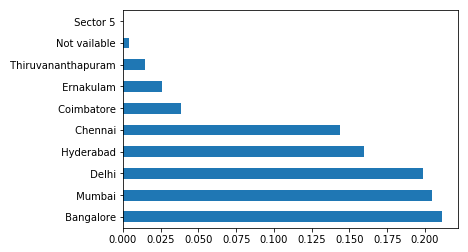

In [297]:
df_train['City'].value_counts(normalize=True)[:20].plot(kind='barh')

In [298]:
df_train.head()

,Experience,Rating,Profile,Fees,No_feedback,feedback %,Area,City,Quali_1,Quali_2,Quali_3
0,24,100,Homeopath,100,16.0,100.0,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,Not Available
1,12,98,Ayurveda,350,76.0,98.0,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,Not Available
2,9,0,ENT Specialist,300,0.0,0.0,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,Not Available
3,12,0,Ayurveda,250,0.0,0.0,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,Not Available
4,20,100,Ayurveda,250,4.0,100.0,Keelkattalai,Chennai,BAMS,Not Available,Not Available


In [299]:
df_train['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Not vailable',
       ' Sector 5'], dtype=object)

In [300]:
df_test.head()

,Experience,Rating,Profile,No_feedback,feedback %,Area,City,Quali_1,Quali_2,Quali_3
0,35,0,General Medicine,0.0,0.0,Ghatkopar East,Mumbai,MBBS,Not Available,Not Available
1,31,0,ENT Specialist,0.0,0.0,West Marredpally,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),Not Available
2,40,70,Dermatologists,4.0,70.0,KK Nagar,Chennai,MBBS,DDVL,Not Available
3,0,0,Ayurveda,0.0,0.0,New Ashok Nagar,Delhi,BAMS,Not Available,Not Available
4,16,100,Dentist,0.0,0.0,Kanakpura Road,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,Not Available


In [301]:
df_train.isnull().sum()

Experience     0
Rating         0
Profile        0
Fees           0
No_feedback    0
feedback %     0
Area           0
City           0
Quali_1        0
Quali_2        0
Quali_3        0
dtype: int64

In [302]:
df_test.isnull().sum()

Experience     0
Rating         0
Profile        0
No_feedback    0
feedback %     0
Area           0
City           0
Quali_1        0
Quali_2        0
Quali_3        0
dtype: int64

#Observation dataset contains no null values 


In [303]:
#df_train.dropna(inplace=True)
#df_train.dropna(inplace=True)

In [304]:
df_train.shape

(5961, 11)

Observation :After cleaning the data, dataset contains 5935 records and 10 variables 

In [305]:
df_test.shape

(1987, 10)

Observation: After cleaning the dataset contains the  1987 records and 9 columns

In [306]:
df_train.describe()

,Experience,Fees,No_feedback,feedback %
count,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,307.944640,9.461668,23.600067
std,11.142798,190.920373,38.755544,40.816442
min,0.000000,5.000000,0.000000,0.000000
25%,9.000000,150.000000,0.000000,0.000000
50%,14.000000,300.000000,0.000000,0.000000
75%,23.000000,500.000000,1.000000,56.000000
max,66.000000,950.000000,854.000000,100.000000


Observation: 
1. Mean of the fees is grater then the mode of the fees 
2. Lowset fees is the 5 Rs
3. 950 is the highest doctor consultaion fee

In [307]:
 #Encoding the Cateogorical variables 
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

#df_train = pd.get_dummies(df_train, columns=['Profile'])
df_train['Profile'] = le.fit_transform(df_train['Profile'])
df_train['Area'] = le.fit_transform(df_train['Area'])
df_train['City'] = le.fit_transform(df_train['City'])
df_train['Quali_1'] = le.fit_transform(df_train['Quali_1'])
df_train['Quali_2'] = le.fit_transform(df_train['Quali_2'])
df_train['Quali_3'] = le.fit_transform(df_train['Quali_3'])


In [308]:
len(df_test['Area']), len(df_test['City']),len(df_test['Quali_1']),len(df_test['Quali_2']),len(df_test['Quali_3'])

(1987, 1987, 1987, 1987, 1987)

In [309]:
#df_test  = pd.get_dummies(df_test,  columns=['Profile'])

df_test['Profile'] = le.fit_transform(df_test['Profile'])
df_test['Area'] = le.fit_transform(df_test['Area'])
df_test['City'] = le.fit_transform(df_test['City'])
df_test['Quali_1'] = le.fit_transform(df_test['Quali_1'])
df_test['Quali_2'] = le.fit_transform(df_test['Quali_2'])
df_test['Quali_3'] = le.fit_transform(df_test['Quali_3'])


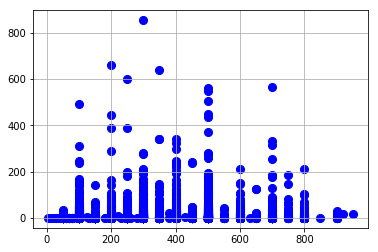

In [310]:
# plot data points
plt.scatter(df_train["Fees"], df_train["No_feedback"], color = "b", s = 65)
plt.grid()

In [311]:
print(df_train["Fees"].value_counts())


100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


Observation: 
1. We clearly see that 100 is the highest population of the fees 
2. Lowset fees is the 5 Rs
3. 950 is the highest doctor consultaion fee

In [312]:
#print(df_train["Experience"].value_counts()

OBservation: Population of 9 years experince doctors are more

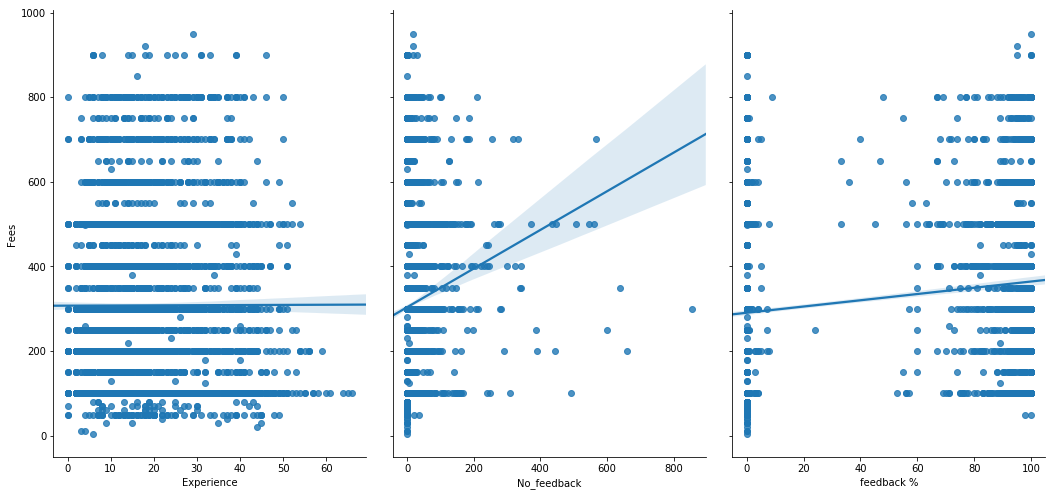

In [313]:
sns.pairplot(df_train, x_vars=['Experience','No_feedback','feedback %'], y_vars='Fees', size=7, aspect=0.7, kind='reg')

Observation:
1. we clearly see that experience and fees have nutral raltionships
2. number of feed back and fees have postive realtion 
3. we see that feed percentage and fees slightly negative relation 

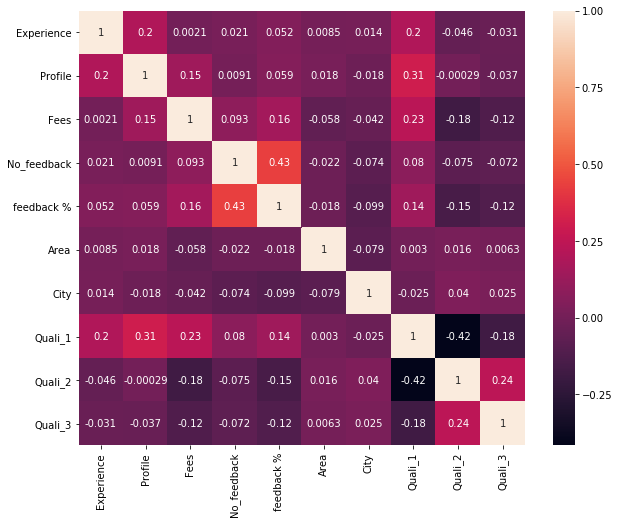

In [314]:
#To check the corr_mat  Heatmap
corr_hmap=df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap, annot=True)
plt.show()

# Observation: 
1. profile and qualification have positve realtionship 31%
2. feed back % and rating have postive raltionship 35%
3. fees and quali_1 have positve relation 23%

In [315]:
#to display the corealtion with the target variables 
corr_matrix=df_train.corr()
corr_matrix['Fees'].sort_values(ascending = False)


Fees           1.000000
Quali_1        0.233285
feedback %     0.157944
Profile        0.145226
No_feedback    0.092667
Experience     0.002117
City          -0.041873
Area          -0.058259
Quali_3       -0.119252
Quali_2       -0.176750
Name: Fees, dtype: float64

Obervation:
1. Qualification1, Profile and No_feedback have positive relation 
2. six variables have negative realtion with the target varibles

In [316]:
df_train.dtypes

Experience       int64
Rating          object
Profile          int32
Fees             int64
No_feedback    float64
feedback %     float64
Area             int32
City             int32
Quali_1          int32
Quali_2          int32
Quali_3          int32
dtype: object

In [317]:
df_train['Rating']=df_train['Rating'].astype(int)
df_test['Rating']=df_test['Rating'].astype(int)

In [318]:
df_train.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'No_feedback', 'feedback %',
       'Area', 'City', 'Quali_1', 'Quali_2', 'Quali_3'],
      dtype='object')

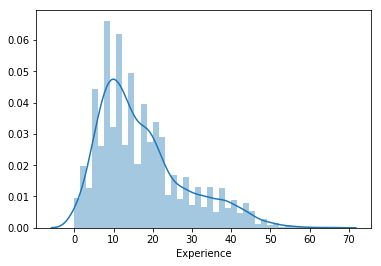

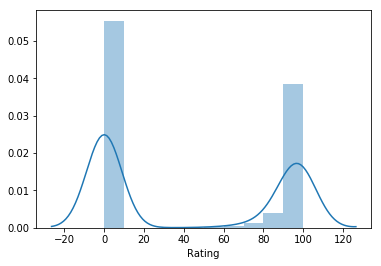

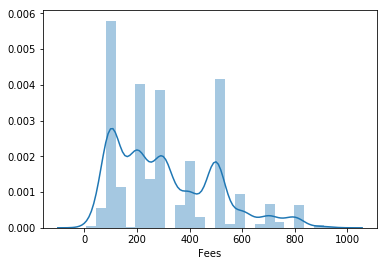

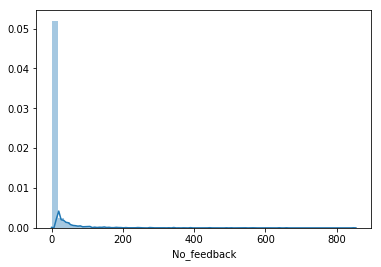

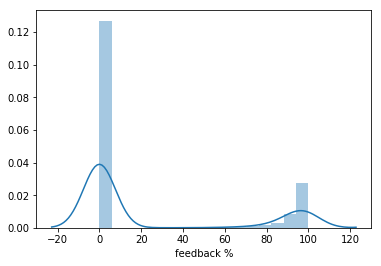

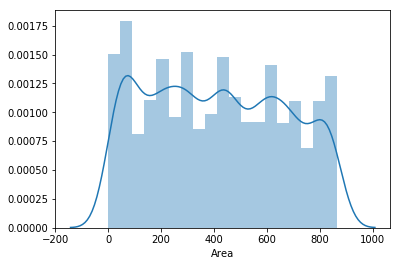

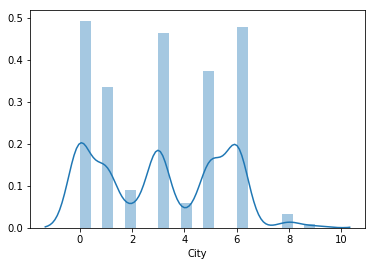

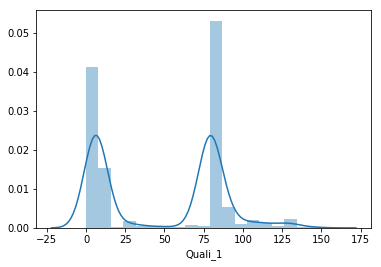

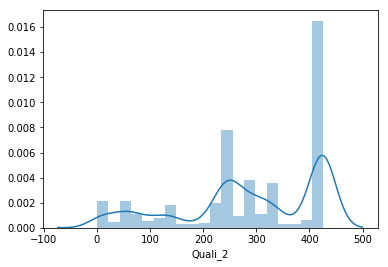

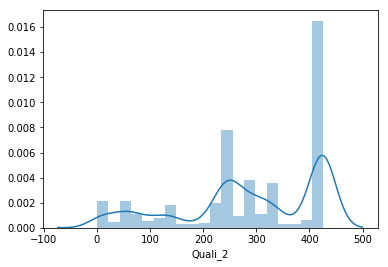

In [319]:
col =['Experience', 'Rating', 'Fees', 'No_feedback', 'feedback %', 'Area', 'City', 'Quali_1', 'Quali_2','Quali_2']
        
for i in df_train[col]:
    plt.figure()
    sns.distplot(df_train[i])

Obseravtion:
1.Experince data distribution is not looks like bell curve so its not distributes normly and not very skewed
2.variable rating data is right skewed
3.qulification1 data is distributed normally

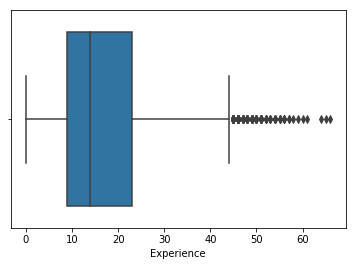

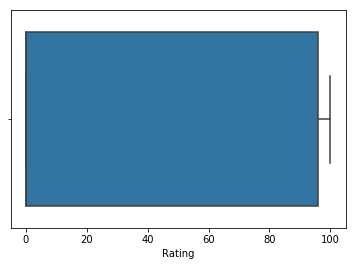

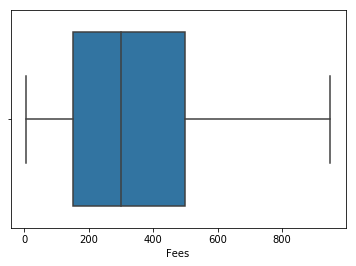

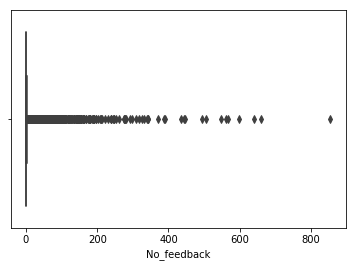

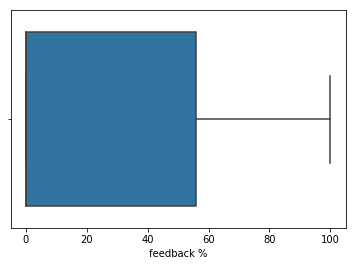

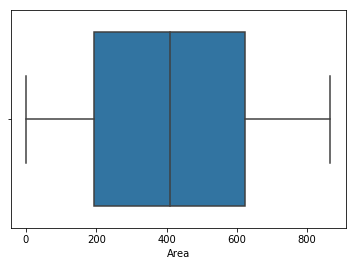

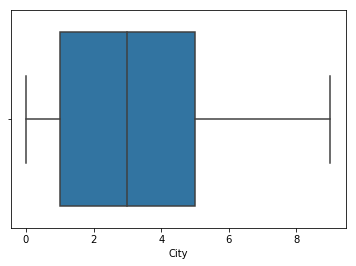

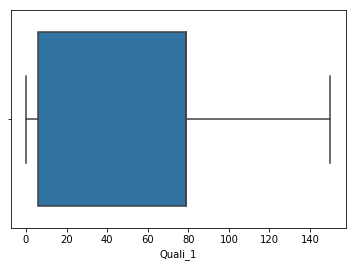

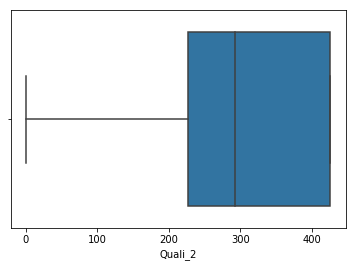

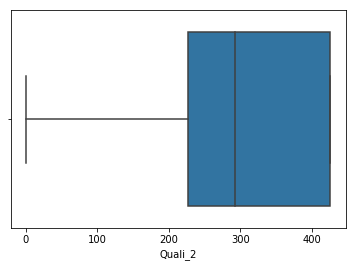

In [320]:
# with the help of box plot checking the outliers in data set 
for i in df_train[col]:
    plt.figure()
    sns.boxplot(df_train[i])

Obseravtion:
1.Variables Experience, feedback  have outlier in the data set

In [321]:
x = df_train.drop(labels=['Fees'], axis=1)
y = df_train['Fees'].values

In [322]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.25, random_state=1)

In [323]:

x_train.shape, y_train.shape, x_cv.shape, y_cv.shape

((4470, 10), (4470,), (1491, 10), (1491,))

In [324]:
x_train.columns

Index(['Experience', 'Rating', 'Profile', 'No_feedback', 'feedback %', 'Area',
       'City', 'Quali_1', 'Quali_2', 'Quali_3'],
      dtype='object')

# Spliting the data into train_test_split

In [331]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# Regression Model

In [336]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred.reshape(-1,1)

array([[257.45460273],
       [387.68233078],
       [343.18527815],
       ...,
       [325.04344572],
       [361.41009764],
       [259.22339027]])

In [337]:
t1=[24,5,100,16.0,100.0,296,4,8,252,405] # t1 actual fees is 100
t2=[9,0,3,0.0,0.0,452,0,79,334,405]  # t2 actual values is 300
t3=[12,0,0,0.0,0.0,68,0,12,7,405] # t3 actual values is 250

In [338]:
print("predicted fees of the doctor is ",regressor.predict([t1])) #actual fee is 100
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:", mean_squared_error(y_test,y_pred))
print('Root Mean Squared error(RMSE):', np.sqrt(mean_squared_error(y_test,y_pred)))

predicted fees of the doctor is  [1583.5019004]
Mean absolute error: 144.4034319900642
Mean squared error: 31896.737584384944
Root Mean Squared error(RMSE): 178.59657775104466


In [339]:
regressor.coef_

array([-1.0061143 ,  0.47432393, 13.52328931,  0.11290954,  0.13531406,
       -0.04495731, -0.63293197,  0.84663159, -0.09660806, -0.09013773])

In [340]:
regressor.intercept_

307.52718405795594

In [341]:
#R2 score --> coefficient of determination 
#the propotion of the variance in the dependent variable that is predictable from the independent variables
#i.e change coming in Y whenever x is being changed
from sklearn.metrics import r2_score
print("We getting the R2 score is :",r2_score(y_test, y_pred))

We getting the R2 score is : 0.09543481034311752


In [347]:
pd.DataFrame(regressor.predict(df_test), columns = ['Fees']).to_excel("regressor_predicted.xlsx", index = False)

# DecisionTreeRegressor

In [342]:
from sklearn.tree import DecisionTreeRegressor
DCTR = DecisionTreeRegressor(random_state = 0)
DCTR.fit(x_train, y_train)

#Predicting the number of win matches by passing the values 
pred = DCTR.predict(x_test)
DCTR.predict([t2])

array([300.])

In [343]:
print(DCTR.predict([t1]))
print(DCTR.predict([t2]))
print(DCTR.predict([t3]))


[300.]
[300.]
[250.]


Observation: Decision treed model is predicting accuratly 

1. Model Predicting t1. value: 100 , actual t1 value : 100
2. Model Predicting t2. value: 300 , actual t1 value : 300
3. Model Predicting t3. value: 250 , actual t1 value : 250

In [346]:
pd.DataFrame(DCTR.predict(df_test), columns = ['Fees']).to_excel("DCTR_predict.xlsx", index = False)

# RandomForestRegressor

In [255]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(x_train, y_train)

y_predRFR =RFR.predict(x_test)
print("Predicted values:",y_predRFR.reshape(-1,1))


Predicted values: [[335.]
 [265.]
 [385.]
 ...
 [225.]
 [515.]
 [590.]]


In [147]:
print("RMSE score is :",np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

RMSE score is : 175.85309281069453


In [256]:
print(RFR.predict([t1]))
print(RFR.predict([t2]))
print(RFR.predict([t3]))

[295.]
[285.]
[240.]


Observation: Random forest model also predicting very near to the acutal values 

In [ ]:
pd.DataFrame(RFR.predict(df_test), columns = ['Fees']).to_excel("RFR_Predicted.xlsx", index = True)

#### Saving the Model----
Decsion Tree Regression model getting the highest accuarcy so we are saving the Decision Tree model

In [ ]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(DCTR, 'DCTR.pkl')
  
# Load the model from the file
DCTR_joblib = joblib.load('DCTR.pkl') 
  
# Use the loaded model to make predictions
#dt_joblib.predict(x_test)